In [230]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline
sns.set(style="whitegrid", palette="Set2")

In [231]:
path = r"C:\Users\buitr\Desktop\Data Analyst\Data Analytics Immersion\A6"

In [232]:
df_all_years = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'all_years.csv'))


In [233]:
df_all_years.head()

,Unnamed: 0,Country,Year,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [234]:
df_all_years.drop('Unnamed: 0', axis=1, inplace=True)

In [235]:
df_all_years.head()

,Country,Year,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [236]:
# Correlation, drop none-numeric variables
df_corr= df_all_years.drop(['Country', 'Year'], axis=1)

In [237]:
df_corr.isnull().sum()

Happiness Score    0
GDP                0
Social Support     0
Life Expectancy    0
Freedom            0
Generosity         0
Trust              0
dtype: int64

In [238]:
df_corr.corr()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
Happiness Score,1.000000,0.789284,0.648799,0.742456,0.551258,0.137578,0.397821
GDP,0.789284,1.000000,0.585966,0.784338,0.340511,-0.014560,0.304181
Social Support,0.648799,0.585966,1.000000,0.572650,0.420361,-0.037262,0.126481
Life Expectancy,0.742456,0.784338,0.572650,1.000000,0.340745,0.010638,0.250463
Freedom,0.551258,0.340511,0.420361,0.340745,1.000000,0.290706,0.459520
Generosity,0.137578,-0.014560,-0.037262,0.010638,0.290706,1.000000,0.318945
Trust,0.397821,0.304181,0.126481,0.250463,0.459520,0.318945,1.000000


In [239]:
correlation_matrix = df_corr.corr()

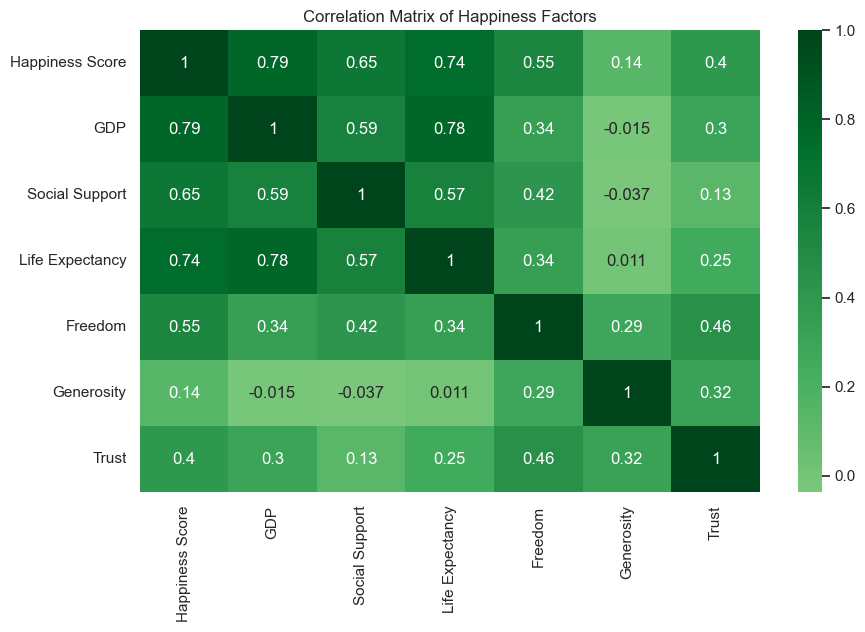

In [267]:
plt.figure(figsize=(10, 6))
heatmap_correlation_matrix= sns.heatmap(correlation_matrix, annot=True, cmap='Greens', center=0)
plt.title("Correlation Matrix of Happiness Factors")
plt.savefig(os.path.join(path,'04 Analysis', 'heatmap_correlation_matrix.png'), dpi=300, bbox_inches='tight')
plt.show()


### Correlation Matrix Insights

- GDP, Social Support, and Life Expectancy all have strong positive correlations with Happiness Score.
- Trust and Freedom show moderate positive correlations.
- Generosity has the weakest correlation with Happiness Score.


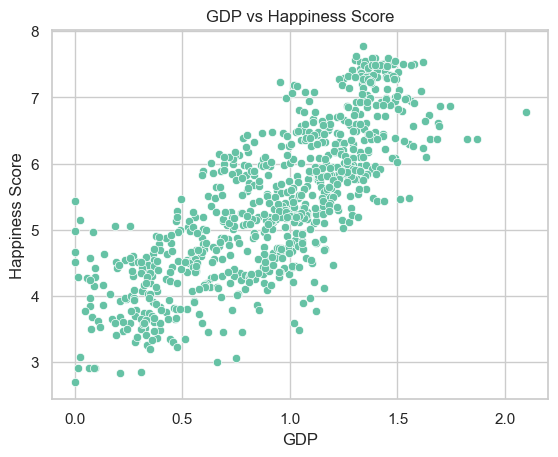

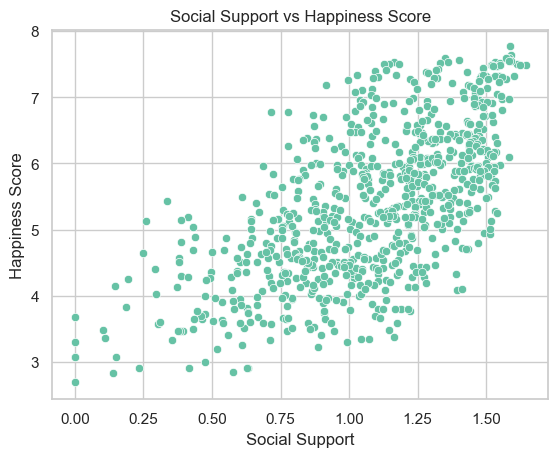

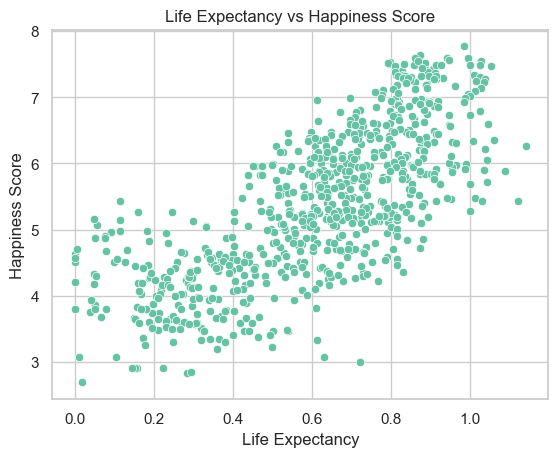

In [269]:
# GDP vs Happiness
scatterplot_GDP_Happiness= sns.scatterplot(x='GDP', y='Happiness Score', data=df_corr)
plt.title('GDP vs Happiness Score')
plt.savefig(os.path.join(path,'04 Analysis', 'scatterplot_GDP_Happiness.png'), dpi=300, bbox_inches='tight')
plt.show()

# Social Support vs Happiness
scatterplot_Social_Support_Happiness= sns.scatterplot(x='Social Support', y='Happiness Score', data=df_corr)
plt.title('Social Support vs Happiness Score')
plt.savefig(os.path.join(path,'04 Analysis', 'scatterplot_Social_Support_Happiness.png'), dpi=300, bbox_inches='tight')
plt.show()

# Life Expectancy vs Happiness
scatterplot_Life_Expectancy_Happiness= sns.scatterplot(x='Life Expectancy', y='Happiness Score', data=df_corr)
plt.title('Life Expectancy vs Happiness Score')
plt.savefig(os.path.join(path,'04 Analysis', 'scatterplot_Life_Expectancy_Happiness.png'), dpi=300, bbox_inches='tight')
plt.show()


### GDP vs Happiness Score
There is a strong positive relationship. As GDP increases, the Happiness Score tends to increase as well.

### Social Support vs Happiness Score
Social Support also shows a strong positive trend. Countries with more social support tend to be happier.

### Life Expectancy vs Happiness Score
This also shows a clear upward trend. Longer life expectancy is associated with higher happiness.

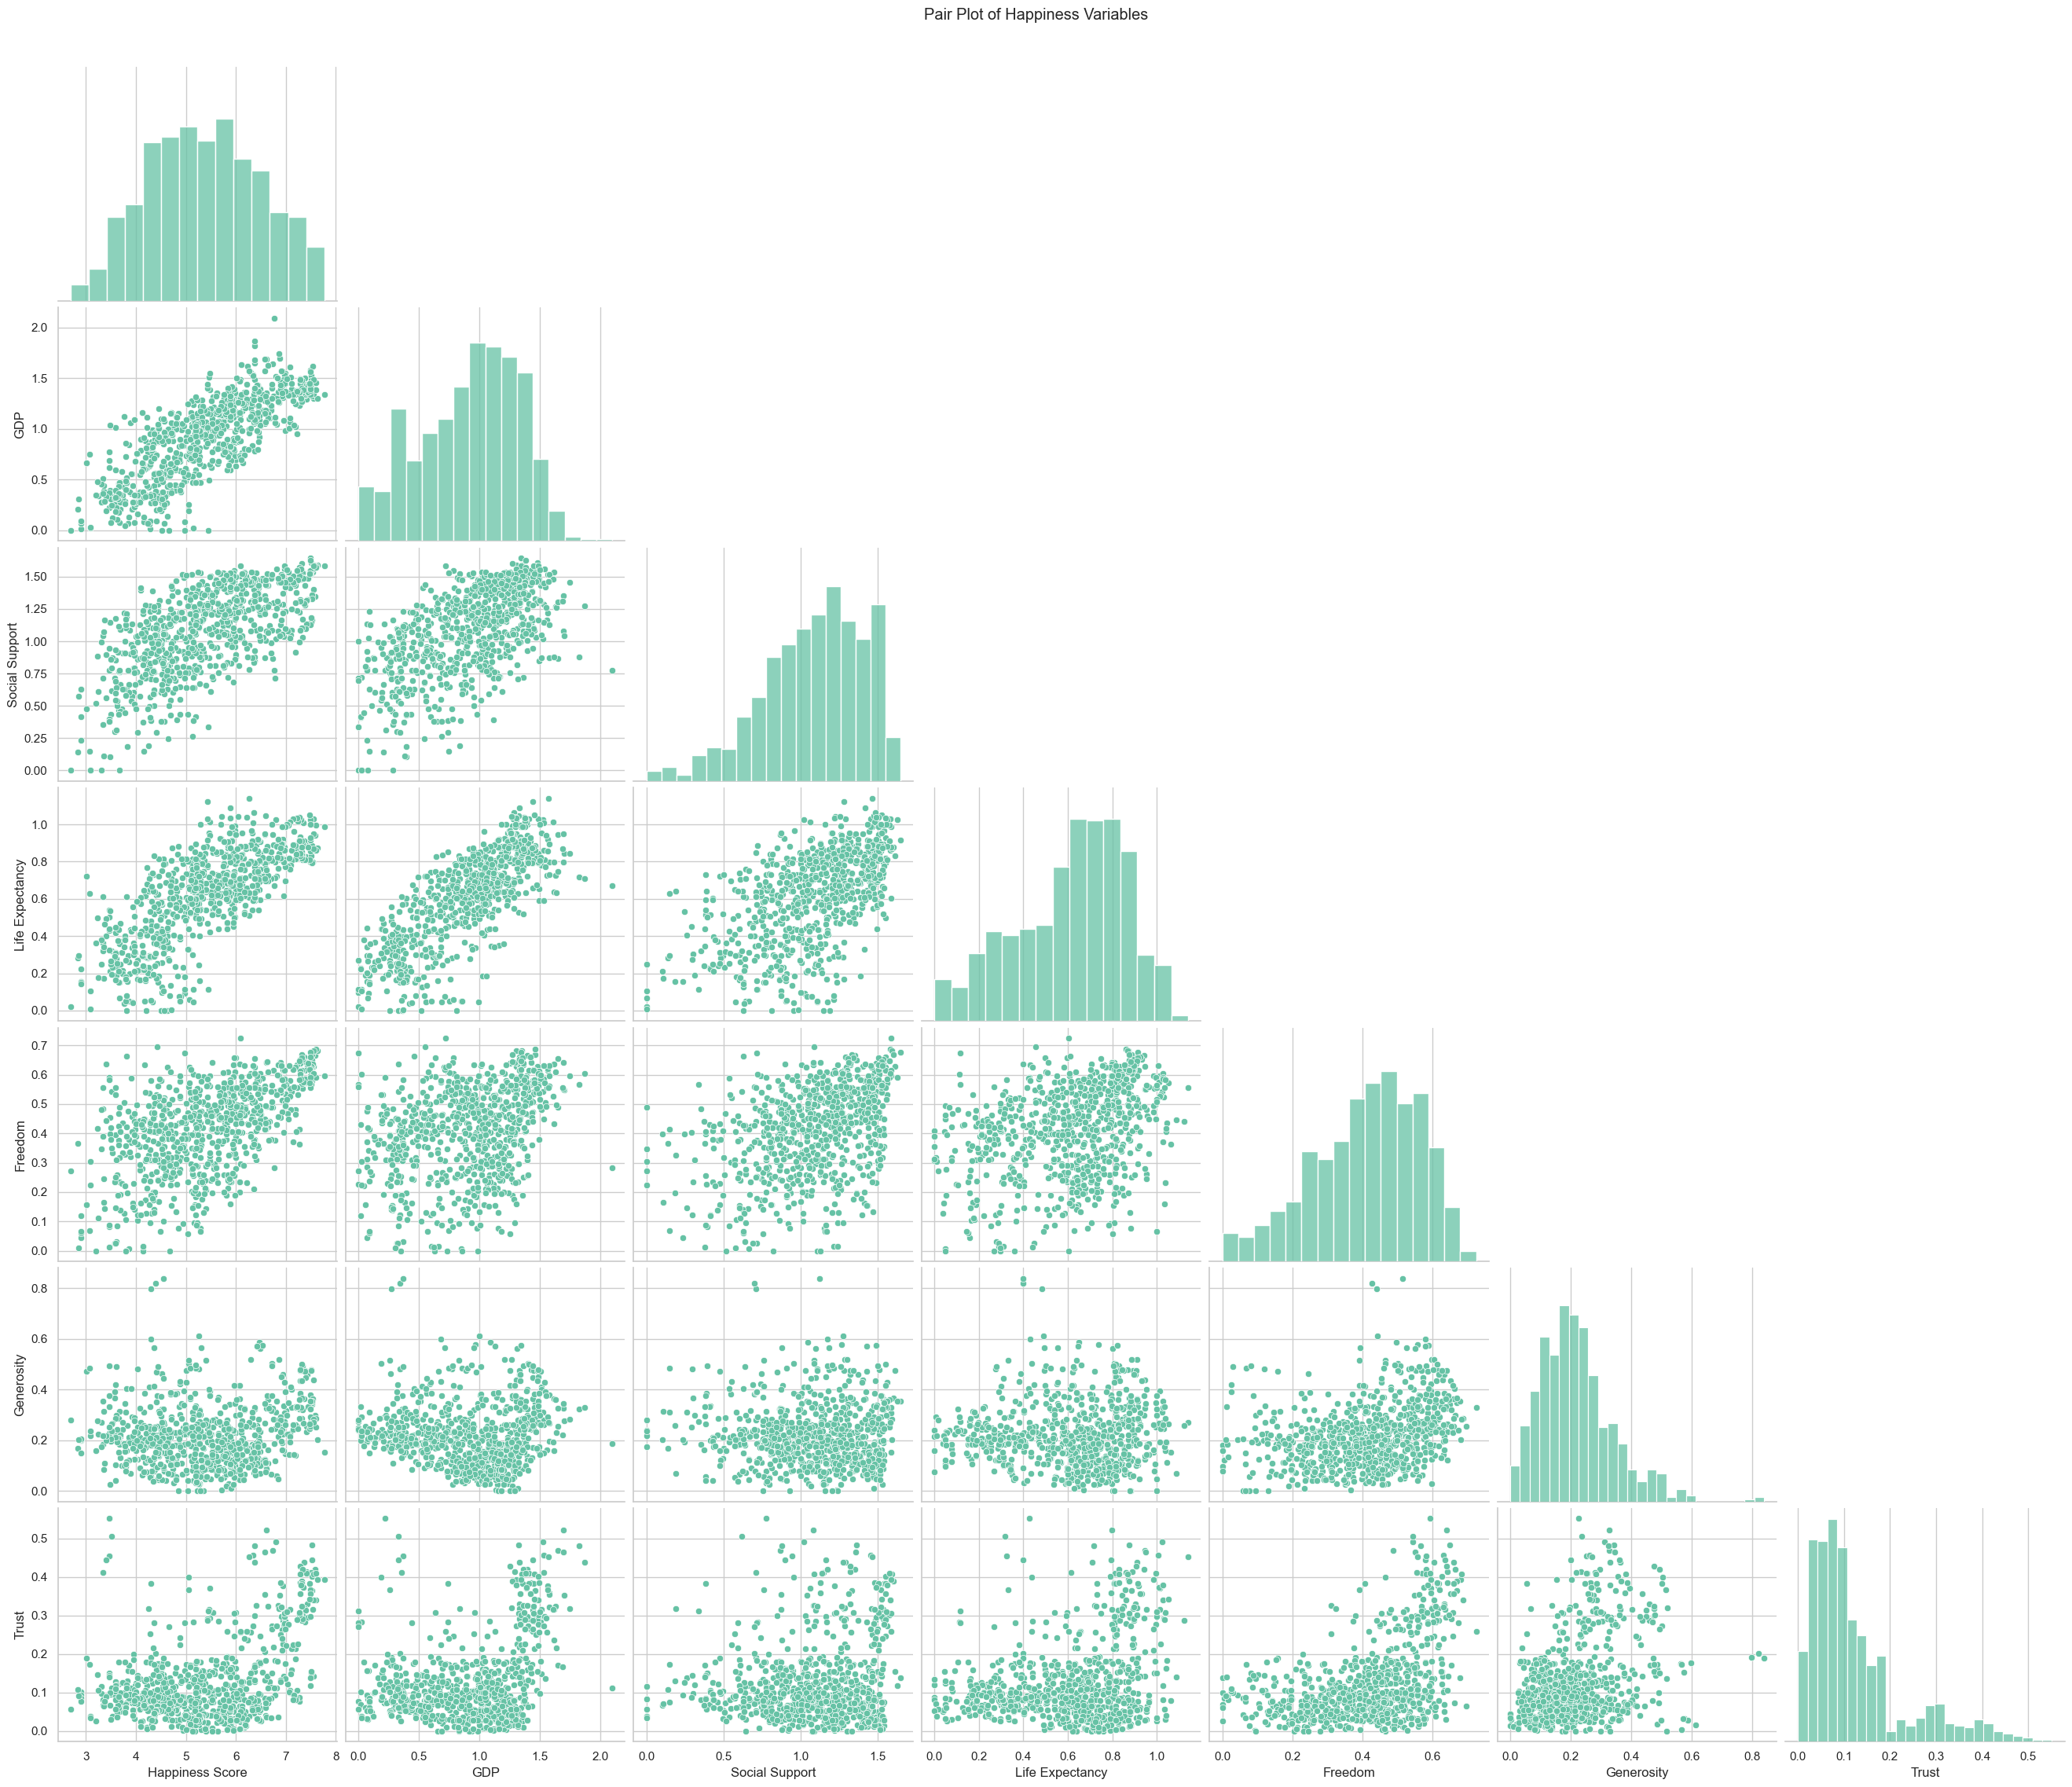

In [273]:
pairplot= sns.pairplot(df_corr, corner=True, height=3.2, aspect=1.2)
plt.suptitle("Pair Plot of Happiness Variables", y=1.02)
plt.savefig(os.path.join(path,'04 Analysis', 'pairplot.png'), dpi=300, bbox_inches='tight')
plt.show()


The pair plot helps identify variables that may be linearly or non-linearly related. Social Support and GDP again show visible trends with Happiness Score. Some variables like Trust or Generosity show less consistent patterns.

C:\Users\buitr\AppData\Local\Temp\ipykernel_32964\1888892003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot_Trust_Level = sns.boxplot(x='Trust Level', y='Happiness Score', data=df, palette="Greens")


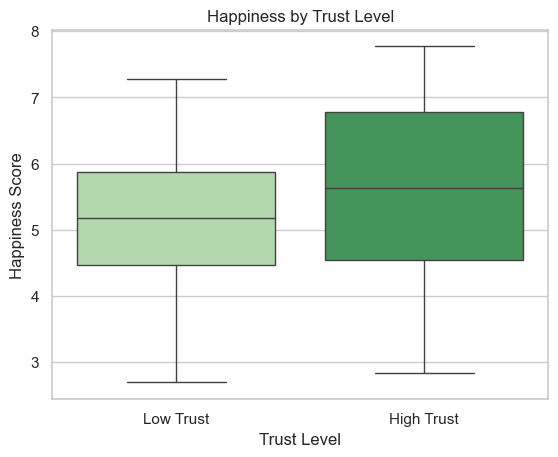

In [246]:
df['Trust Level'] = pd.qcut(df['Trust'], q=2, labels=["Low Trust", "High Trust"])
boxplot_Trust_Level = sns.boxplot(x='Trust Level', y='Happiness Score', data=df, palette="Greens")
plt.title("Happiness by Trust Level")
plt.show()


On average, countries with higher trust in government tend to report higher happiness scores.

### New questions that arose

- How did global happiness inequality evolve over the years?
- Do countries with high generosity also tend to show high trust?
- Which region saw the greatest change in happiness?

### Hypotheses to test
Based on the visual exploration of the dataset, the following hypotheses are proposed for further statistical testing:

1. Social support has a stronger effect on happiness than economic wealth.
This hypothesis explores whether strong interpersonal and community support contributes more to happiness than GDP per capita.

2. Countries with high social support but low trust in government have lower happiness than countries with high trust.
This investigates whether trust in institutions amplifies the benefits of social support.

3. Trust and social support together explain more variation in happiness than GDP alone.
A combined model of social variables may better explain happiness outcomes than economic indicators by themselves.

4. The gap in happiness between high-trust and low-trust countries has widened from 2015 to 2019.
This tests whether trust in government has become a more significant factor for happiness over time.

5. Countries with high happiness despite low GDP consistently show high levels of social support.
This highlights whether strong support systems can offset economic limitations in maintaining national well-being.